In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv('p2_mod.csv')

In [3]:
X = data.drop(columns='Y', axis=1)
y = data['Y']

In [4]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
print(X)

           X1  X2  X3  X4  X5  X6  X7  X8  X9  X10  ...     X14    X15    X16  \
0       20000   2   2   1  24   2   2  -1  -1   -2  ...     689      0      0   
1      120000   2   2   2  26  -1   2   0   0    0  ...    2682   3272   3455   
2       90000   2   2   2  34   0   0   0   0    0  ...   13559  14331  14948   
3       50000   2   2   1  37   0   0   0   0    0  ...   49291  28314  28959   
4       50000   1   2   1  57  -1   0  -1   0    0  ...   35835  20940  19146   
...       ...  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...     ...    ...    ...   
29995  220000   1   3   1  39   0   0   0   0    0  ...  208365  88004  31237   
29996  150000   1   3   2  43  -1  -1  -1  -1    0  ...    3502   8979   5190   
29997   30000   1   2   2  37   4   3   2  -1    0  ...    2758  20878  20582   
29998   80000   1   3   1  41   1  -1   0   0    0  ...   76304  52774  11855   
29999   50000   1   2   1  46   0   0   0   0    0  ...   49764  36535  32428   

         X17    X18    X19 

In [6]:
print(y)

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: Y, Length: 30000, dtype: int64


In [7]:
from sklearn.feature_selection import SelectKBest

In [8]:
from sklearn.feature_selection import f_classif

In [9]:
fit_features = SelectKBest(score_func = f_classif)

In [10]:
fit_features.fit(X,y)

SelectKBest()

In [11]:
score_col = pd.DataFrame(fit_features.scores_, columns = ['Score Value'])

In [12]:
name_col = pd.DataFrame(X.columns)

In [13]:
top_features = pd.concat([name_col, score_col], axis =1)

In [14]:
top_features

,0,Score Value
0,X1,724.068539
1,X2,47.978854
2,X3,23.547112
3,X4,17.781271
4,X5,5.788556
5,X6,3537.714970
6,X7,2239.169136
7,X8,1757.466444
8,X9,1476.845967
9,X10,1304.591176


In [15]:
top_features.nlargest(10,'Score Value')

,0,Score Value
5,X6,3537.714970
6,X7,2239.169136
7,X8,1757.466444
8,X9,1476.845967
9,X10,1304.591176
10,X11,1085.402485
0,X1,724.068539
17,X18,160.403810
18,X19,103.291524
20,X21,97.188000


In [16]:
select = ["X6","X7", "X8", "X9", "X10", "X11", "X1", "X18","X19", "X21","Y"]
new_df = data[select]

In [17]:
x = new_df.drop(columns='Y', axis=1)
y = new_df['Y']

In [18]:
print(x)

       X6  X7  X8  X9  X10  X11      X1    X18    X19   X21
0       2   2  -1  -1   -2   -2   20000      0    689     0
1      -1   2   0   0    0    2  120000      0   1000  1000
2       0   0   0   0    0    0   90000   1518   1500  1000
3       0   0   0   0    0    0   50000   2000   2019  1100
4      -1   0  -1   0    0    0   50000   2000  36681  9000
...    ..  ..  ..  ..  ...  ...     ...    ...    ...   ...
29995   0   0   0   0    0    0  220000   8500  20000  3047
29996  -1  -1  -1  -1    0    0  150000   1837   3526   129
29997   4   3   2  -1    0    0   30000      0      0  4200
29998   1  -1   0   0    0   -1   80000  85900   3409  1926
29999   0   0   0   0    0    0   50000   2078   1800  1000

[30000 rows x 10 columns]


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

BFE->

In [22]:
!pip install mlxtend

In [23]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
#import mlrose
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
import seaborn as sns
import joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.ensemble import RandomForestClassifier as rfc
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [24]:
sbs = SFS(#knn(n_neighbors=3),
           #rfc(n_jobs=8),
           LGR(max_iter=4000),
           k_features='best', 
           forward=False, 
           floating=False, 
           verbose=2,
           #scoring = 'neg_mean_squared_error',  # sklearn regressors
           scoring='accuracy',  # sklearn classifiers
           cv=3)
sbs = sbs.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.5s finished

[2022-03-23 17:37:13] Features: 9/1 -- score: 0.81075[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.1s finished

[2022-03-23 17:37:14] Features: 8/1 -- score: 0.81175[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.9s finished

[2022-03-23 17:37:15] Features: 7/1 -- score: 0.8119999999999999[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 

In [25]:
sbs.k_feature_idx_

(0,)

In [26]:
df = pd.DataFrame.from_dict(sbs.get_metric_dict()).T
df = df[["feature_idx","avg_score"]]

In [27]:
df

,feature_idx,avg_score
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)",0.809333
9,"(0, 2, 3, 4, 5, 6, 7, 8, 9)",0.81075
8,"(0, 2, 3, 4, 5, 6, 8, 9)",0.81175
7,"(0, 2, 3, 4, 5, 6, 8)",0.812
6,"(0, 2, 3, 4, 5, 6)",0.811875
5,"(0, 2, 3, 5, 6)",0.811875
4,"(0, 2, 3, 6)",0.811833
3,"(0, 3, 6)",0.811625
2,"(0, 6)",0.812208
1,"(0,)",0.819667


In [28]:
sbs.subsets_

{1: {'avg_score': 0.8196666666666667,
  'cv_scores': array([0.823625, 0.819125, 0.81625 ]),
  'feature_idx': (0,),
  'feature_names': ('0',)},
 2: {'avg_score': 0.8122083333333333,
  'cv_scores': array([0.813375, 0.81075 , 0.8125  ]),
  'feature_idx': (0, 6),
  'feature_names': ('0', '6')},
 3: {'avg_score': 0.8116249999999999,
  'cv_scores': array([0.80975 , 0.8125  , 0.812625]),
  'feature_idx': (0, 3, 6),
  'feature_names': ('0', '3', '6')},
 4: {'avg_score': 0.8118333333333333,
  'cv_scores': array([0.809125, 0.81175 , 0.814625]),
  'feature_idx': (0, 2, 3, 6),
  'feature_names': ('0', '2', '3', '6')},
 5: {'avg_score': 0.811875,
  'cv_scores': array([0.809125, 0.811625, 0.814875]),
  'feature_idx': (0, 2, 3, 5, 6),
  'feature_names': ('0', '2', '3', '5', '6')},
 6: {'avg_score': 0.811875,
  'cv_scores': array([0.809125, 0.811625, 0.814875]),
  'feature_idx': (0, 2, 3, 4, 5, 6),
  'feature_names': ('0', '2', '3', '4', '5', '6')},
 7: {'avg_score': 0.8119999999999999,
  'cv_scores':

Selected Features ID : (0,)


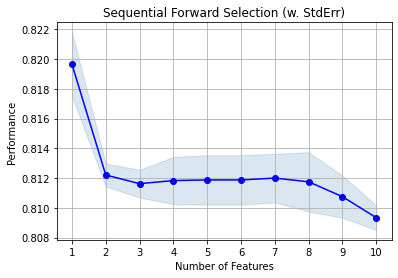

In [31]:
from matplotlib import pyplot as plt
fig = plot_sfs(sbs.get_metric_dict(), kind='std_err')
# print("Selected Features :", sbs.k_feature_names_)
print("Selected Features ID :", sbs.k_feature_idx_)
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [32]:
newdf = pd.DataFrame(X_train)
print(newdf)

              0         1         2         3         4         5         6  \
0      0.014796  0.109694  0.141120  0.188700  0.234055  0.250571 -0.672359   
1      0.014796  0.109694  0.141120  0.188700  0.234055  0.250571 -1.057768   
2      0.014796  0.109694 -0.698046 -0.667404 -0.648616 -0.617206  0.098459   
3      0.014796  0.109694  0.141120  0.188700  0.234055  0.250571 -0.826523   
4      0.014796  0.109694  0.141120  0.188700  0.234055  0.250571 -0.286950   
...         ...       ...       ...       ...       ...       ...       ...   
23995  0.014796  0.109694  0.141120  0.188700  0.234055  0.250571 -0.903605   
23996  1.790286  1.779631  1.819451  1.900908  1.999396  1.986124  0.252623   
23997 -1.760694 -1.560243 -1.537212 -1.523508 -1.531286 -1.484983 -0.903605   
23998  0.014796  0.109694  0.141120  0.188700  1.999396  1.986124 -0.749441   
23999 -1.760694 -1.560243 -1.537212 -1.523508 -1.531286 -1.484983 -0.055704   

              7         8         9  
0     -0.1268

In [33]:
selected = list(sbs.k_feature_idx_)

In [34]:
x_bfe = newdf.iloc[:, selected]
print(x_bfe)

              0
0      0.014796
1      0.014796
2      0.014796
3      0.014796
4      0.014796
...         ...
23995  0.014796
23996  1.790286
23997 -1.760694
23998  0.014796
23999 -1.760694

[24000 rows x 1 columns]


In [35]:
bfe_X_train, bfe_X_test, bfe_y_train, bfe_y_test = train_test_split(x_bfe, y_train, test_size = 0.2, random_state = 42)

SVM

In [36]:
from sklearn import svm
from sklearn.svm import SVC

In [37]:
svm = svm.SVC()
svm.fit(bfe_X_train, bfe_y_train)
svm.score(bfe_X_train, bfe_y_train)*100

82.13541666666667

In [38]:
svm_score = svm.score(bfe_X_test, bfe_y_test)*100
print("SVM Accuracy:", svm_score)

SVM Accuracy: 81.29166666666666


KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier()
classifier = KNeighborsClassifier(n_neighbors = 81)
classifier.fit(bfe_X_train, bfe_y_train)
knn.fit(bfe_X_train, bfe_y_train)

KNeighborsClassifier()

In [40]:
score = knn.score(bfe_X_test, bfe_y_test)
print("KNN Algorithm Score:", score*100)

KNN Algorithm Score: 78.14583333333334


Dt

In [41]:
from sklearn.tree import DecisionTreeClassifier
dclf = DecisionTreeClassifier()
dclf.fit(bfe_X_train, bfe_y_train)

DecisionTreeClassifier()

In [42]:
j=dclf.score(bfe_X_test, bfe_y_test)
print("Decision Tree Algorithm Score:",j*100)

Decision Tree Algorithm Score: 81.29166666666666


RF

In [43]:
def run_randomForest(bfe_X_train, bfe_y_train,bfe_X_test, bfe_y_test):
    clf = RandomForestClassifier(n_estimators= 100, random_state = 42, n_jobs = -1)
    clf.fit(bfe_X_train, bfe_y_train)
    y_pred = clf.predict(bfe_X_test)
    score = accuracy_score(bfe_y_test,y_pred)*100
    print("Random Forest Accuracy:", score)

In [47]:
from sklearn.ensemble import RandomForestClassifier
run_randomForest(bfe_X_train, bfe_y_train,bfe_X_test, bfe_y_test)

Random Forest Accuracy: 81.29166666666666


LR

In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(bfe_X_train, bfe_y_train)
lr = model.score(bfe_X_test, bfe_y_test)*100
print("Logistic Regression Accuracy:", lr)

Logistic Regression Accuracy: 81.29166666666666
